# 2110101: การบ้านครั้งที่ 8: เรื่อง File Covid19

ข้อมูลผู้ติดเชื้อ Covid19 ในประเทศไทยที่รายงานเก็บอยู่ในเว็บไซต์ data.go.th ซึ่งนิสิตสามารถ download ข้อมูลในช่วงปัจจุบันได้จาก link https://data.go.th/dataset/8a956917-436d-4afd-a2d4-59e4dd8e906e/resource/a783d27f-4792-4e9d-80d2-9697d7c01b4c/download/confirmed-cases-since-280265.csv หรือสามารถ run เซลล์ด้านล่างเพื่อ download file มาใช้บน colab 

In [1]:
! wget https://data.go.th/dataset/8a956917-436d-4afd-a2d4-59e4dd8e906e/resource/a783d27f-4792-4e9d-80d2-9697d7c01b4c/download/confirmed-cases-since-280265.csv

--2022-03-20 18:39:52--  https://data.go.th/dataset/8a956917-436d-4afd-a2d4-59e4dd8e906e/resource/a783d27f-4792-4e9d-80d2-9697d7c01b4c/download/confirmed-cases-since-280265.csv
Resolving data.go.th (data.go.th)... 164.115.75.59
Connecting to data.go.th (data.go.th)|164.115.75.59|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 97802957 (93M) [text/csv]
Saving to: ‘confirmed-cases-since-280265.csv’

confirmed-cases-sin 100%[===================>]  93.27M  1.97MB/s    in 60s     

2022-03-20 18:40:54 (1.57 MB/s) - ‘confirmed-cases-since-280265.csv’ saved [97802957/97802957]



ข้อมูลในไฟล์จะเก็บเป็นรูปแบบ csv คือเป็นข้อความที่คั่นด้วยเครื่องหมายจุลภาค `(',')` โดยมีบรรทัดแรกเป็นหัวตาราง ดังตัวอย่างด้านล่าง 

```
No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
2869617,28/2/2022,27/2/2022,ชาย,41,ปี,Thailand,พะเยา,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,พะเยา,เมืองพะเยา
2869618,28/2/2022,27/2/2022,หญิง,45,ปี,Thailand,พะเยา,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,พะเยา,เมืองพะเยา
2869619,28/2/2022,27/2/2022,หญิง,40,ปี,Thailand,พะเยา,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,พะเยา,เมืองพะเยา
2869620,28/2/2022,27/2/2022,ชาย,44,ปี,Thailand,พะเยา,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,พะเยา,เมืองพะเยา
2869621,28/2/2022,27/2/2022,ชาย,11,ปี,Thailand,พะเยา,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,พะเยา,เมืองพะเยา
2869622,28/2/2022,27/2/2022,หญิง,19,ปี,Thailand,พะเยา,อยู่ระหว่างการสอบสวน,พะเยา,เมืองพะเยา
2869623,28/2/2022,27/2/2022,หญิง,22,ปี,Thailand,พะเยา,อยู่ระหว่างการสอบสวน,พะเยา,เมืองพะเยา
2869624,28/2/2022,27/2/2022,ชาย,61,ปี,Thailand,พะเยา,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,พะเยา,แม่ใจ
2869625,28/2/2022,27/2/2022,หญิง,46,ปี,Thailand,พะเยา,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,พะเยา,แม่ใจ
2869626,28/2/2022,27/2/2022,ชาย,61,ปี,Thailand,พะเยา,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,พะเยา,แม่ใจ
...
```

ซึ่งหมายถึงตารางดังรูป
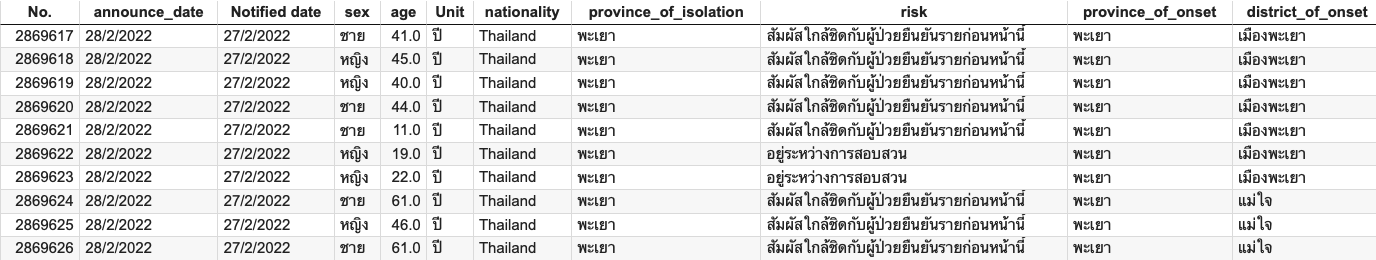

แต่เนื่องจากข้อมูลมีความผิดพลาดอยู่เล็กน้อย นิสิตจำเป็นต้องรันเซลล์ด้านล่างนี้เพื่อจัดการความผิดพลาดนั้น (เป็นเรื่องปกติที่ต้องทำในขั้นตอนการประมวลข้อมูลโดยทั่วไป เราเรียกขั้นตอนนี้ว่า Data Cleansing) 

## Data Cleansing

In [2]:
#@title
import pandas as pd

df=pd.read_csv('confirmed-cases-since-280265.csv')
df['district_of_onset']=df['district_of_onset'].str.replace('\n','')
df.to_csv('confirmed-cases-since-280265.csv',index=False)

## งานของนิสิต


จงเขียนฟังก์ชัน `get_unique_value`, `count_announce_date_province`, `count_value_in_column`, `create_file_by_value_in_column`, `count_by_date` และ `create_summary_file` ตามรายละเอียดที่เขียนใน comment ของ code cell ข้างล่างนี้

### การส่งงาน
  * Save a copy in Drive 
  * เปลี่ยนชื่อ Notebook ให้เป็น HW8_xxxxxxxxxx.ipynb โดย xxxxxxxxxx เป็นเลขประจำตัวนิสิต 
  * File -> Download -> Download .ipynb
  * ส่งไฟล์ที่ดาวน์โหลดได้ใน MyCourseVille ก่อนเวลา 23:59 น. วันที่ 23 มีนาคม 2565 
  * จะตรวจแฟ้ม .ipynb แฟ้มล่าสุดที่ส่งในระบบ MyCourseVille เท่านั้น

<hr>

### <font color=red>สำคัญ: อ่านตรงนี้ด้วย</font>
- ห้ามเปลี่ยนบรรทัดแรกของ code cell
- ห้ามเปลี่ยนบรรทัด def ของฟังก์ชันที่ให้เขียน
- นิสิตสามารถเขียนฟังก์ชันเพิ่มได้แต่ให้เขียนภายใน code cell เดียวกันด้านล่างนี้
- ฟังก์ชันต้องคืนข้อมูลและประเภทข้อมูลตามที่กำหนดเท่านั้น
- ฟังก์ชันต้องไม่ใช้ข้อมูลในตัวแปรใด ๆ นอกฟังก์ชัน
- ฟังก์ชันต้องไม่เปลี่ยนแปลงข้อมูลภายในของพารามิเตอร์ที่ได้รับ (หากระบุไว้ในข้อกำหนด)
- ส่งแฟ้ม .ipynb กี่ครั้งก็ได้ แต่จะตรวจแฟ้ม .ipynb **แฟ้มล่าสุด** เท่านั้น
- โปรแกรมที่ทำงานไม่ได้ เกิด error ก็ไม่ได้คะแนน (แนะนำให้ compile อย่างน้อยหนึ่งครั้งก่อนส่งเพื่อเช็ค error)
- ห้าม import อะไรใด ๆ เพิ่ม ห้ามใช้ฟังก์ชันจาก pandas และห้ามใช้ set นอกนั้น อยากใช้คำสั่งอะไร ก็ใช้ได้ ถ้าทำงานได้ใน [Python version 3.7](https://docs.python.org/3.7/)
- <font color=red>ส่อทุจริต</font> เช่น
  - ส่งโปรแกรมที่ผู้ส่งไม่สามารถอธิบายได้ว่า ใช้หลักการและทำงานอย่างไร
  - หรือ ส่งโปรแกรมที่คล้ายกับโปรแกรมของผู้อื่นมาก ๆ (ไม่ว่าจะเป็นผู้ให้หรือผู้รับ จะตั้งใจหรือไม่ก็ตาม)

- หากพบว่า งานที่ส่งส่อทุจริต จะได้คะแนน **<font color=red>ติดลบคะแนนรวมสะสมตั้งแต่การบ้านครั้งแรกสุด</font>**

<hr>

### ตัวอย่างทดสอบแต่ละฟังก์ชัน (ผลลัพธ์ที่นิสิตได้อาจต่างจากนี้เล็กน้อย เนื่องจากข้อมูลมีการอัปเดตทุกวัน)

1.   `get_unique_value`
     * `get_unique_value('confirmed-cases-since-280265.csv','announce_date')`
      * คืนค่า `['28/2/2022', '1/3/2022', '2/3/2022', '3/3/2022', '4/3/2022', '5/3/2022', '6/3/2022', '7/3/2022', '8/3/2022', '9/3/2022', '10/3/2022', '11/3/2022', '12/3/2022', '13/3/2022', '14/3/2022', '15/3/2022', '16/3/2022', '17/3/2022']`
     * `get_unique_value('confirmed-cases-since-280265.csv','date')`
      * คืนค่า `[]`

2.   `count_announce_date_province`
  * `count_announce_date_province('confirmed-cases-since-280265.csv','15/3/2022','กรุงเทพมหานคร')`
      * คืนค่า 2919
    * `count_announce_date_province('confirmed-cases-since-280265.csv','15/3/2022','แพร่')`
      * คืนค่า 70
    * `count_announce_date_province('confirmed-cases-since-280265.csv','15/3/2022','อื่นๆ')`
      * คืนค่า 0

3.   `count_value_in_column`
  * `count_value_in_column('confirmed-cases-since-280265.csv','province_of_isolation','กรุงเทพมหานคร')`
      * คืนค่า 53611
    * `count_value_in_column('confirmed-cases-since-280265.csv','announce_date','15/3/2022')`
      * คืนค่า 19742
    * `count_value_in_column('confirmed-cases-since-280265.csv','announce_date','15/3/2020')`
      * คืนค่า 0


4. `create_file_by_value_in_column`
  * `create_file_by_value_in_column('confirmed-cases-since-280265.csv','แพร่.csv','province_of_isolation','แพร่')`
    * ฟังก์ชันต้องสร้างไฟล์ชื่อ แพร่.csv โดยมีข้อความดังนี้
    ```
    No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
2869998,28/2/2022,27/2/2022,ชาย,9.0,เดือน,Thailand,แพร่,อื่นๆ,แพร่,เมืองแพร่
2869999,28/2/2022,27/2/2022,หญิง,56.0,ปี,Thailand,แพร่,อื่นๆ,แพร่,เมืองแพร่
2870000,28/2/2022,27/2/2022,หญิง,56.0,ปี,Thailand,แพร่,อื่นๆ,แพร่,เมืองแพร่
2870001,28/2/2022,27/2/2022,ชาย,36.0,ปี,Thailand,แพร่,อื่นๆ,แพร่,เมืองแพร่
2870002,28/2/2022,27/2/2022,หญิง,39.0,ปี,Thailand,แพร่,อื่นๆ,แพร่,เมืองแพร่
    ...
    ```
  * `create_file_by_value_in_column('confirmed-cases-since-280265.csv','แพร่.csv','province','แพร่')`
    * ฟังก์ชันจะต้องไม่สร้างไฟล์ใด ๆ

5. `count_by_date`
  * `count_by_date('confirmed-cases-since-280265.csv','กรุงเทพมหานคร')`
    * คืนค่า `[2781, 2802, 3054, 2810, 2620, 2836, 2184, 2815, 2949, 3190, 3216, 3202, 3009, 2982, 3060, 2919, 3475, 3707]`
  * `count_by_date('confirmed-cases-since-280265.csv','ลำพูน')`
    * คืนค่า `[4, 6, 6, 10, 15, 4, 7, 7, 0, 2, 11, 0, 0, 8, 6, 2, 3, 6]`
  * `count_by_date('confirmed-cases-since-280265.csv','ปทุมวัน')`
    * คืนค่า `[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]`

6. `create_summary_file`
  * `create_summary_file('confirmed-cases-since-280265.csv','summary.csv')`
    * จะสร้างไฟล์ชื่อ `summary.csv` ที่มีข้อความในไฟล์ดังนี้
    ```
    province_of_isolation,28/2/2022,1/3/2022,2/3/2022,3/3/2022,4/3/2022,5/3/2022,6/3/2022,7/3/2022,8/3/2022,9/3/2022,10/3/2022,11/3/2022,12/3/2022,13/3/2022,14/3/2022,15/3/2022,16/3/2022,17/3/2022
กระบี่,187,104,154,173,154,139,100,112,116,155,153,170,171,173,166,142,166,187
กรุงเทพมหานคร,2781,2802,3054,2810,2620,2836,2184,2815,2949,3190,3216,3202,3009,2982,3060,2919,3475,3707
กาญจนบุรี,318,189,265,177,217,338,206,176,203,285,222,349,231,231,277,286,363,364
...
```











In [17]:
# HW8_StrFile (ไม่ลบหรือแก้ไขบรรทัดนี้ หรือเพิ่มอะไรก่อนบรรทัดนี้ โดยเด็ดขาด)

# - เขียนในเซลล์นี้เท่านั้น 
# - ถ้าต้องการเขียนฟังก์ชันเพิ่ม ก็เขียนในเซลล์นี้

def get_p(column_name):
  column = ['No.', 'announce_date', 'Notified date', 'sex', 'age', 'Unit', 'nationality', 'province_of_isolation', 'risk', 'province_of_onset', 'district_of_onset']
  if column_name in column:
    return column.index(column_name)
  else:
    return -1


def get_unique_value(filename,column_name):
  '''
  คืนค่าเป็นลิสต์ที่มีสมาชิกไม่ซ้ำของค่าในคอลัมน์ column_name เรียงลำดับตามบรรทัดที่ปรากฏในไฟล์
  หากไม่มีชื่อคอลัมน์ปรากฏอยู่ ให้คืนค่าเป็นลิสต์ว่าง
  '''
  infile = open(filename,'r')
  n = get_p(column_name)
  if n>=0:
    output = []
    line = infile.readline()
    while True:
      line = infile.readline()
      if len(line)==0:
        break
      info = line.split(',')[n]
      if info not in output:
        output+=[info]
    infile.close()
    return output


def count_announce_date_province(filename,date,province):
  '''
  คืนค่าเป็นจำนวนบรรทัดที่มีค่า province_of_isolation เท่ากับ province และ announce_date เท่ากับ date 
  หากไม่มีข้อมูลของจังหวัดและวันตามอินพุต ให้คืนค่า 0
  '''
  infile = open(filename, 'r')
  line = infile.readline()
  count = 0
  while True:
    line = infile.readline()
    if len(line)==0:
      break
    info = line.split(',')
    if info[1]==date and info[7]==province:
      count+=1
  return count



def count_value_in_column(filename,column_name,value):
  '''
  คืนค่าเป็นจำนวนบรรทัดที่มีค่าเท่ากับ value ในคอลัมน์ column_name 
  คืนค่าเป็น -1 ในกรณีที่ไม่มีคอลัมน์ตาม column_name
  ''' 
  n = get_p(column_name)
  if n<0:
    return -1
  else:
    count = 0
    infile = open(filename, 'r')
    line = infile.readline()
    while True:
      line = infile.readline()
      if len(line)==0:
        break
      info = line.split(',')
      if info[n]==value:
        count+=1
    infile.close()
    return count

def create_file_by_value_in_column(filename,fileout,column_name,value):
  '''
  สร้างไฟล์ที่มีชื่อเป็น fileout โดยเลือกเฉพาะบรรทัดที่มีค่าในคอลัมน์ column_name เท่ากับ value  
  ในกรณีที่ไม่มีชื่อคอลัมน์ตาม column_name ให้ออกจากฟังก์ชันโดยไม่ต้องทำอะไร 
  ในไฟล์ที่สร้างขึ้นใหม่ จะต้องมีบรรทัดที่เป็นชื่อคอลัมน์เหมือนต้นฉบับ ตามด้วยข้อมูลตามกำหนด
  ''' 
  n = get_p(column_name)
  if n>=0:
    infile = open(filename, 'r')
    newfile = open(fileout, 'w')
    line = infile.readline()
    newfile.write(line+'\n')
    while True:
      line = infile.readline()
      if len(line)==0:
        break
      info = line.split(',')
      if info[n]==value:
        newfile.write(line+'\n')

    infile.close()
    newfile.close()


def count_by_date(filename,province):
  '''
  คืนลิสต์ของจำนวนผู้ติดเชื้อรายวันที่รายงานของทุก announce_date เรียงตามวันที่ปรากฏในไฟล์
  ตามบรรทัดที่ province_of_isolation มีค่าเท่ากับ province
  หากวันใดไม่มีข้อมูลของจังหวัดนั้น ๆ รายงาน ให้ใส่ค่าเป็น 0 
  '''
  infile = open(filename,'r')
  line = infile.readline()
  date = []
  count = []
  line = infile.readline()
  while True:
    line = infile.readline()
    if len(line)==0:
      break
    info = line.split(',')[1]
    if info not in date:
      date+=[info]
      count+=[0]

    info = line.split(',')
    if info[7]==province:
      count[date.index(info[1])]+=1
  infile.close()
  return count


def create_summary_file(filename,fileout):
  '''
  สร้างไฟล์ที่มีบรรทัดแรกเป็น province_of_isolation,28/2/2022,1/3/2022,2/3/2022,3/3/2022,... เรียงวันที่ไปจนครบตามที่มีในไฟล์ 
  แต่ละบรรทัดหลังจากนั้นเก็บจำนวนผู้ติดเชื้อของแต่ละจังหวัด ตาม province_of_isolation เรียงจังหวัดตามพจนานุกรม
  โดยในแต่ละจังหวัดเป็นจำนวนผู้ติดเชื้อที่รายงานในแต่ละวันตามข้อมูลใน announce_date (เรียงวันตามที่อ่านมาจากไฟล์)
  '''
  newfile = open(fileout, 'w')
  infile = open(filename, 'r')
  st = 'province_of_isolation'

  # date = get_unique_value(filename,'announce_date')
  date=[]
  province=[]
  count=[]
  line = infile.readline()
  while True:
    line = infile.readline()
    info = line.split(',')
    if len(line)==0:
      break
    d = info[1]
    if d not in date:
      date+=[d]

    p = info[7]
    if p not in province:
      province+=[p]

  infile.close()
  province.sort()

  infile = open(filename, 'r')
  for i in date:
    st+=','+i
  newfile.write(st)

  count = [[0 for x in range(len(date))] for y in range(len(province)) ]

  # amount = count_by_date(filename,p)
  line = infile.readline()
  while True:
    line = infile.readline()
    if len(line)==0:
      break
    info = line.split(',')
    count[province.index(info[7])][date.index(info[1])]+=1
  
  for i in range(len(province)):
    sen = province[i]
    for n in range(len(date)):
      sen+=','+str(count[i][n])
    newfile.write('\n'+sen)
  
  infile.close()
  newfile.close()


# print(sorted(get_unique_value('confirmed-cases-since-280265.csv','province_of_isolation')))
# print(count_announce_date_province('confirmed-cases-since-280265.csv','15/3/2022','กรุงเทพมหานคร'))
# print(count_value_in_column('confirmed-cases-since-280265.csv','province_of_isolation','กรุงเทพมหานคร'))

# create_file_by_value_in_column('confirmed-cases-since-280265.csv','แพร่.csv','province_of_isolation','แพร่')
# fn = open('แพร่.csv','r')
# while True:
#   print(fn.readline())
#   if len(fn.readline())==0:
#     break
# fn.close()

# print(count_by_date('confirmed-cases-since-280265.csv','กรุงเทพมหานคร'))

# %timeit create_summary_file('confirmed-cases-since-280265.csv','summary.csv')
# fn = open('summary.csv','r')
# while True:
#   line = fn.readline()
#   print(line)
#   if len(line)==0:
#     break
# fn.close()

1 loop, best of 5: 2.85 s per loop


<a id='the_code_cell'></a>
## Bonus (+10% ของคะแนนเต็ม)

ฟังก์ชัน create_summary_file ที่นิสิตเขียนขึ้น สามารถทำงานได้กับไฟล์ที่ download มาจาก data.go.th ได้เร็วกว่า 2:30 นาที (ด้วยการ run ใน colab)


